1. split the data into a training and test set

2. conduct an exploratory data analysis

3. train a regression model

4. iteratively optimize the model by expanding or selecting features

5. regularize the model to avoid overfitting

6. calculate a RMSLE for the training and test set

7. upload your code to GitHub

In [322]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### Read DataFrame

In [323]:
bike_df=pd.read_csv('train.csv')

In [324]:
bike_df.shape

(10886, 12)

In [325]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


### Expand datetime

In [326]:
ts = pd.to_datetime(bike_df['datetime'])
bike_df['year'] = ts.dt.year
bike_df['month'] = ts.dt.month
bike_df['day'] = ts.dt.day
bike_df['hour'] = ts.dt.hour

In [327]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  year        10886 non-null  int64  
 13  month       10886 non-null  int64  
 14  day         10886 non-null  int64  
 15  hour        10886 non-null  int64  
dtypes: float64(3), int64(12), object(1)
memory usage: 1.3+ MB


### Split Train & Test

In [328]:
X = bike_df.drop(['datetime','count','casual','registered'], axis=1)
y = bike_df['count']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7620, 12), (3266, 12), (7620,), (3266,))

### Reset Indexs

In [329]:
X_train.reset_index(inplace=True)
y_train=y_train.reset_index(inplace=False)

X_test.reset_index(inplace=True)
y_test=y_test.reset_index(inplace=False)

X_train = X_train.drop('index', axis=1)
y_train = y_train.drop('index', axis=1)

y_test = y_test.drop('index', axis=1)
X_test = X_test.drop('index', axis=1)

### Feature Selection using RandomForestRegressor

In [330]:
from sklearn.ensemble import RandomForestRegressor

In [331]:
rf = RandomForestRegressor(max_depth=5, random_state=0)

In [332]:
rf.fit(X_train, y_train)

<ipython-input-332-168a6fc83696>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=5, random_state=0)

In [333]:
pd.DataFrame({'importance': rf.feature_importances_, 'feature': X_train.columns}).\
sort_values('importance', ascending=False)  #feature_importance- use for RF model

,importance,feature
11,0.688933,hour
8,0.125344,year
5,0.076776,atemp
9,0.050393,month
4,0.034901,temp
0,0.016739,season
2,0.006573,workingday
1,0.000185,holiday
6,0.000117,humidity
3,0.000021,weather


### Feature Selection using Lasso

In [334]:
from sklearn.linear_model import Lasso

In [335]:
l = Lasso()

In [336]:
l.fit(X_train, y_train)

Lasso()

In [337]:
pd.DataFrame({'feature': X_train.columns, 'coefficient': np.abs(l2.coef_)}).\
sort_values('coefficient', ascending=False)

,feature,coefficient
2,workingday,78.476723
0,season,7.810020
4,temp,7.554762
9,month,5.324894
10,day,2.093271
8,year,1.907054
11,hour,0.838154
3,weather,0.489986
1,holiday,0.202619
5,atemp,0.000000


### Hyperparameters optimization using GridSearchCV

In [338]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import PoissonRegressor


In [339]:
pr_opt = PoissonRegressor()

In [360]:
hyperparam_grid = { 
    'max_iter': [100, 1000],
    'tol': [1e-4,1e-5]
}

In [361]:
grid_cv = GridSearchCV(estimator=pr_opt,            
                       param_grid=hyperparam_grid,
                       cv=5,                        
                       scoring='accuracy')          

In [362]:
grid_cv.fit(X_train, y_train)

/Users/Disalo/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/Disalo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:287: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
/Users/Disalo/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/Disalo/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_se

GridSearchCV(cv=5, estimator=PoissonRegressor(),
             param_grid={'max_iter': [100, 1000], 'tol': [0.0001, 1e-05]},
             scoring='accuracy')

In [363]:
results_df = pd.DataFrame(grid_cv.cv_results_)

In [364]:
results_df.shape , results_df.columns

((4, 15),
 Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
        'param_max_iter', 'param_tol', 'params', 'split0_test_score',
        'split1_test_score', 'split2_test_score', 'split3_test_score',
        'split4_test_score', 'mean_test_score', 'std_test_score',
        'rank_test_score'],
       dtype='object'))

In [365]:
grid_cv.best_params_  

{'max_iter': 100, 'tol': 0.0001}

### Fit the model using PoissonRegressor

In [366]:
m = PoissonRegressor(alpha=1, max_iter=100, tol=0.0001)

In [367]:
m.fit(X_train, y_train)

/Users/Disalo/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/Disalo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_glm/glm.py:287: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


PoissonRegressor(alpha=1)

In [368]:
y_pred = m.predict(X_test)

### Mean Squared Log Error

In [369]:
from sklearn.metrics import mean_squared_log_error

np.sqrt(mean_squared_log_error(y_test, y_pred))


1.2153182203805004

### Compare Prediction and Labels

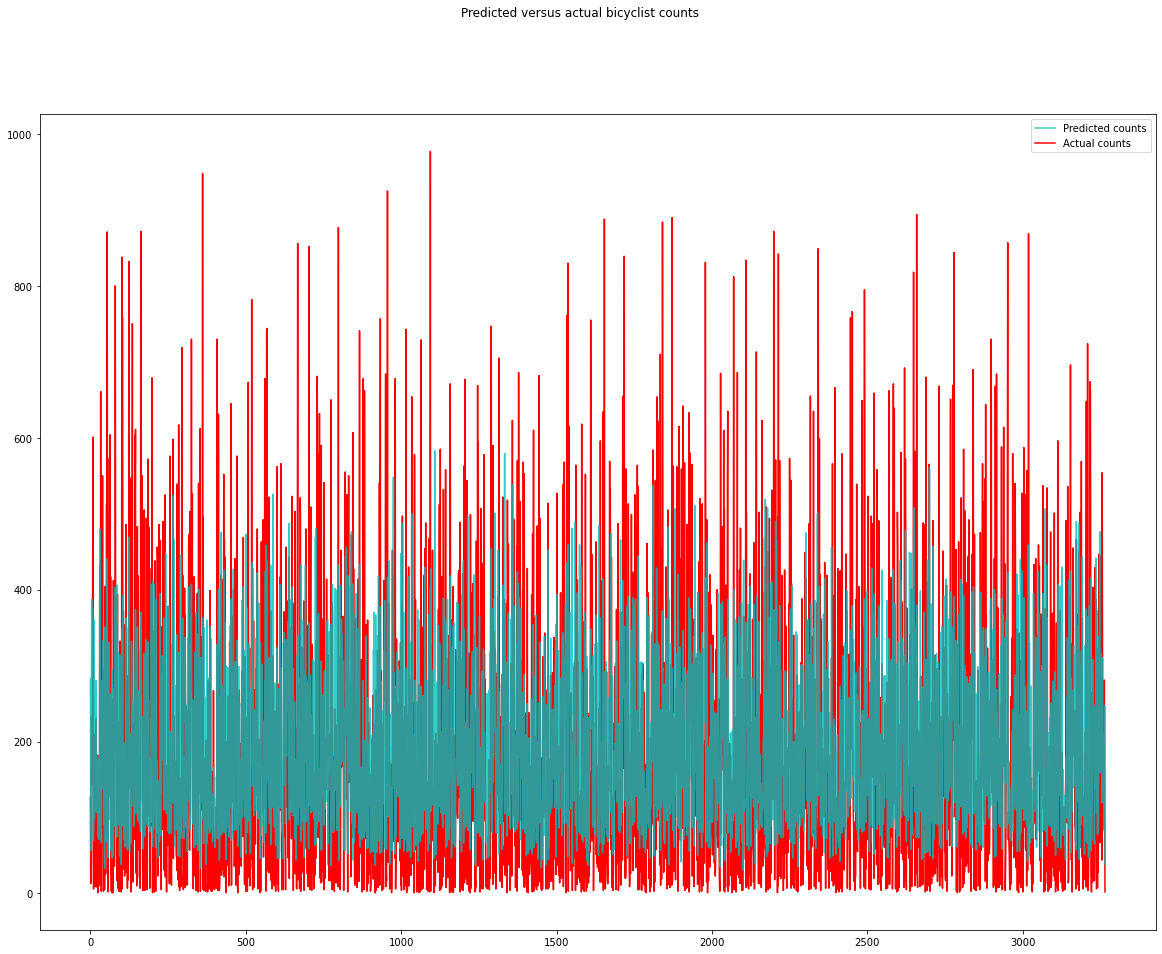

In [374]:
fig = plt.figure(figsize=(20,15))
fig.suptitle('Predicted versus actual bicyclist counts')
actual, = plt.plot(X_test.index, y_test, 'r-', label='Actual counts', alpha=1)
predicted, = plt.plot(X_test.index, y_pred, 'c-', label='Predicted counts', alpha=0.8)

plt.legend(handles=[predicted, actual])
plt.show()